## Ejercicio Time Series Forecast
Para este ejercicio vamos a predecir cuál será la demanda de pasajeros de una aerolinea, para poder anticiparse a las contrataciones de personal, mantenimiento de las aeronaves y gestión de inventario y comidas.

Para ello, se pide:
1. Carga datos (AirPassengers.csv) y representa la serie. ¿Hay seasonality? ¿Cada cuanto?
2. Crea en una gráfica la variable original + su media obtenida mediante una rolling window con el valor de seasonality obtenido en el apartado anterior. Tienes que usar la función rolling() del DataFrame.
3. Comprueba de manera estadística si la serie es o no stationary.
4. Aplica una transformación logarítmica sobre los datos para mejorar el proceso de transformación de tu time series a stationary. Acuérdate después del forecast de invertir la transformación.
5. Divide en train y test. Guarda 20 muestras para test.
6. Crea tu primer modelo ARIMA. Habrá varias combinaciones en función de sus hiperparámetros... Mide el MAE y RMSE del modelo en predicción. Ten en cuenta el parámetro "m" de la función ARIMA, mediante el cual se establece el seasonality.
7. Representa en una gráfica los datos de test y tus predicciones.
8. Prueba un decission tree y un random forest, a ver qué performance presentan.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Carga datos y representa la serie

In [21]:
df = pd.read_csv('data/AirPassengers.csv')
df.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [22]:
df['date'] = pd.to_datetime(df['date'])

In [23]:
df.set_index('date', inplace=True)

In [24]:
plt.plot(df['date'],df['value'], '-r')
plt.xticks(rotation=45);

KeyError: 'date'

## 2. Crea en una gráfica la variable original + su media obtenida mediante una rolling window comparando el valor de seasonality obtenido en el apartado anterior

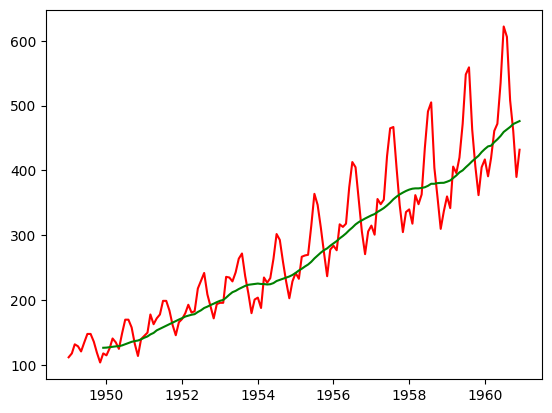

In [ ]:
plt.plot(df['value'], '-r')
plt.plot(df['value'].rolling(window=12).mean(), '-g');

## 3. Comprueba de manera estadística si la serie es o no stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

In [ ]:
result = adfuller(df['value'].values)
result[1]    

0.9918802434376409

La serie **no** es estacionaria

## 4. Aplica una transformación logarítmica

In [25]:
df['value_log'] = np.log(df['value'])

In [26]:
df.head()

,value,value_log
date,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791


## 5. Divide en train y test. Guarda 20 muestras para test.

In [30]:
train = df['value_log'].iloc[:124]
test = df['value_log'].iloc[124:]

## 6. Crea tu primer modelo ARIMA

In [32]:
from pmdarima.arima import auto_arima
from pmdarima.arima import ARIMA

In [43]:
#1. sin seasonality
model = auto_arima(train,
                   start_p = 1,
                   start_q = 1,
                   max_p = 5,
                   max_q = 5,
                   max_d = 3,
                   trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-208.997, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-201.351, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-202.849, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-204.251, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-202.180, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-204.379, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-225.736, Time=0.48 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-229.588, Time=0.54 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-228.969, Time=0.48 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-233.772, Time=0.68 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-214.822, Time=0.38 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-232.7

In [44]:
model.fit(train)
predictions1 = model.predict(20)

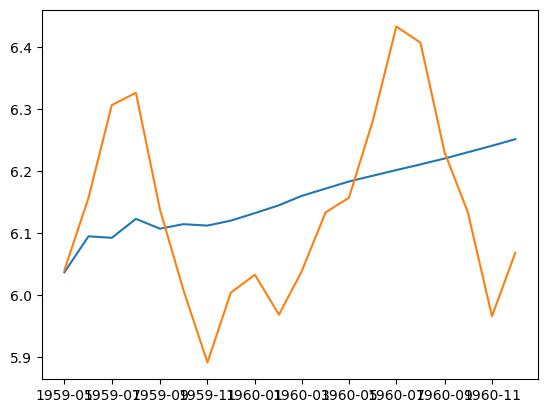

In [45]:
plt.plot(predictions1)
plt.plot(test)

In [34]:
#2 sin auto-arima
import itertools
p= range(4,13)
d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq[:10]
results = []
for param in pdq:
    try:
        model_arima = ARIMA(order=param)
        model_arima_fit = model_arima.fit(train)
        results.append((param,model_arima_fit.aic()))
    except:
        continue
resultados_df = pd.DataFrame(results, columns=['ARIMA params', 'AIC']).sort_values('AIC')
resultados_df.head()

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\P

,ARIMA params,AIC
206,"(12, 1, 1)",-390.620946
205,"(12, 1, 0)",-388.995660
208,"(12, 1, 3)",-388.361803
207,"(12, 1, 2)",-387.996904
184,"(11, 1, 4)",-383.940885


In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
#3 con seasonality
model = auto_arima(train,
                    start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                    m = 12,
                    trace=True,
                    stepwise=True)

print(model.aic())

predictions = model.predict(20)
print("mean_squared_error:", mean_squared_error(test, predictions))

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=-409.667, Time=2.10 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-290.649, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-399.417, Time=1.39 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-353.179, Time=0.63 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-125.472, Time=0.04 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=-411.631, Time=0.98 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=-384.170, Time=0.35 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=-409.696, Time=3.09 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=-405.268, Time=1.55 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=-408.054, Time=3.86 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-408.087, Time=0.91 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=-410.733, Time=1.69 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-409.956, Time=1.59 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-300.825, Time=0.29 sec
 ARIMA(0,0,2)(0,1,1

## 7. Representa en una gráfica los datos de test y tus predicciones.

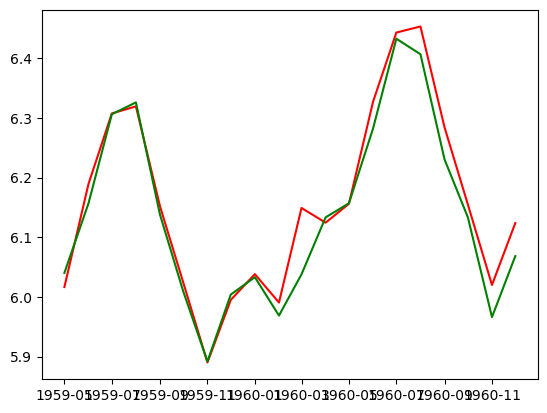

In [42]:
plt.plot(predictions, '-r')
plt.plot(test, '-g');

## 8. Prueba otros modelos, a ver qué performance presentan.

In [46]:
for i in range(24,0,-1):
    df['t-'+str(i)] = df['value'].shift(i)

df.dropna(inplace=True)
df

,value,value_log,t-24,t-23,t-22,t-21,t-20,t-19,t-18,t-17,...,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
date,,,,,,,,,,,,,,,,,,,,,
1951-01-01,145,4.976734,112.0,118.0,132.0,129.0,121.0,135.0,148.0,148.0,...,141.0,135.0,125.0,149.0,170.0,170.0,158.0,133.0,114.0,140.0
1951-02-01,150,5.010635,118.0,132.0,129.0,121.0,135.0,148.0,148.0,136.0,...,135.0,125.0,149.0,170.0,170.0,158.0,133.0,114.0,140.0,145.0
1951-03-01,178,5.181784,132.0,129.0,121.0,135.0,148.0,148.0,136.0,119.0,...,125.0,149.0,170.0,170.0,158.0,133.0,114.0,140.0,145.0,150.0
1951-04-01,163,5.093750,129.0,121.0,135.0,148.0,148.0,136.0,119.0,104.0,...,149.0,170.0,170.0,158.0,133.0,114.0,140.0,145.0,150.0,178.0
1951-05-01,172,5.147494,121.0,135.0,148.0,148.0,136.0,119.0,104.0,118.0,...,170.0,170.0,158.0,133.0,114.0,140.0,145.0,150.0,178.0,163.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,606,6.406880,505.0,404.0,359.0,310.0,337.0,360.0,342.0,406.0,...,407.0,362.0,405.0,417.0,391.0,419.0,461.0,472.0,535.0,622.0
1960-09-01,508,6.230481,404.0,359.0,310.0,337.0,360.0,342.0,406.0,396.0,...,362.0,405.0,417.0,391.0,419.0,461.0,472.0,535.0,622.0,606.0
1960-10-01,461,6.133398,359.0,310.0,337.0,360.0,342.0,406.0,396.0,420.0,...,405.0,417.0,391.0,419.0,461.0,472.0,535.0,622.0,606.0,508.0


In [47]:
x = df.iloc[::, 2:]
y = df['value']

In [59]:
x_train = x[:100]
x_test = x[100:]
y_train = y[:100]
y_test = y[100:]

In [60]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(100, 24) (20, 24) (100,) (20,)


In [50]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
model_rf = RandomForestRegressor(max_depth=5)

In [62]:
model_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5)

In [63]:
predictions = model_rf.predict(x_test)

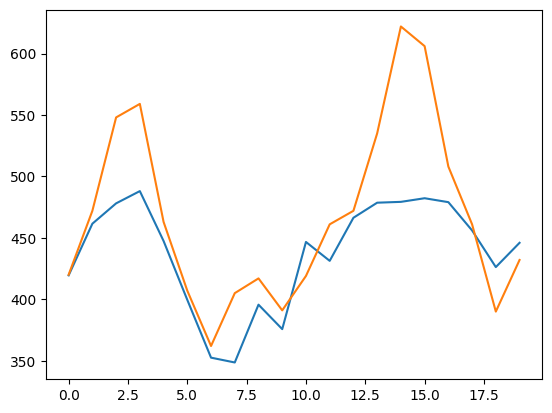

In [65]:
plt.plot(predictions)
plt.plot(y_test.values);